In [26]:
%reload_ext autoreload
%autoreload 2

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot3d_make_layout

from pytrans.ions import Ca40

In [29]:
trap = SurfaceTrap()
waveform = np.load('waveform.npy')

--------------
Trap potential analysis for ion Average[Ca40, Ca40]: 
Equilibrium position [um]
[99.9762  0.0001 67.082 ]
Gradient [V/m]
[-0.0142  0.0375  0.0008]
Displacement at 1 MHz [um]
[-0.0009  0.0023  0.0001]
Hessian [V/m2]
[[ 1.6352e+07  1.3197e+05 -8.0412e+05]
 [ 1.3197e+05  6.4877e+08  7.9998e+07]
 [-8.0412e+05  7.9998e+07  5.4378e+08]]
Normal mode frequencies [MHz]
[0.999985 5.53305 6.50525]
Eigenvectors
[[-1 0.000409 -0.00159]
 [0.00159 0.475 -0.88]
 [-0.000394 0.88 0.475]]
Tilt angle of mode 2 (6.51): 28.36°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40]: 
Equilibrium positions [um]
[[102.7884  -0.001   67.0854]
 [ 97.1825   0.0013  67.0765]]
Normal modes
  Freq [MHz]                    Ca40                                Ca40
------------  ----------  ----------  ----------  ----------  ----------  ---------
      0.9996   0.7092     -0.0001979   0.0005458   0.705      -0.0003756   0.001692
      1.732   -0.705       0.0001916  -0.0005232   0.7092     -0.

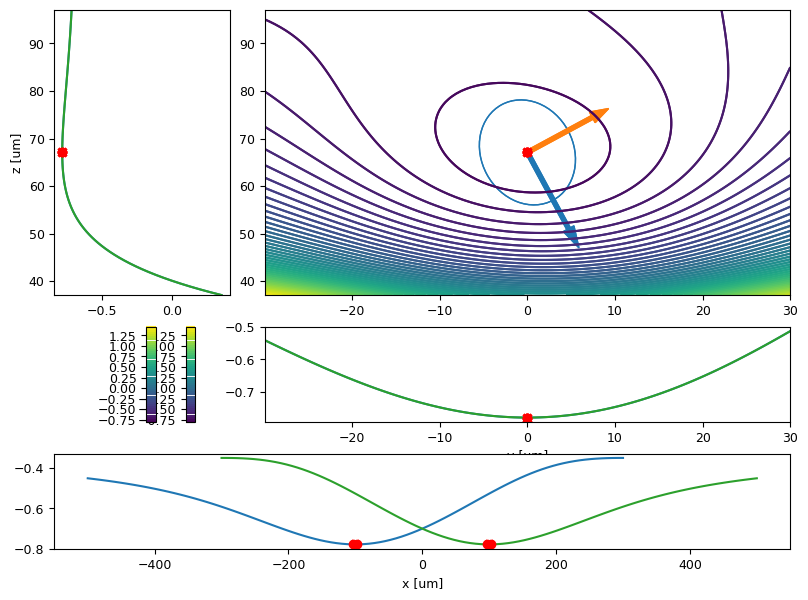

In [30]:
r0 = np.asarray((0, 0, trap.z0)) + np.random.randn(3)*1e-8

fig, axes = plot3d_make_layout(1)
res = analyse_potential(trap, voltages=waveform[0], ions=[Ca40, Ca40], r0=r0, verbose=False, axes=axes)
res = analyse_potential(trap, voltages=waveform[-1], ions=[Ca40, Ca40], r0=r0, verbose=False, axes=axes)
res

In [31]:
from pytrans.analysis import analyse_waveform

In [32]:
results = analyse_waveform(trap, waveform, ions=[Ca40, Ca40], r0=r0)


Waveform analysis: 100%|██████████| 50/50 [00:07<00:00,  6.36it/s]


In [33]:
x_eq = np.stack([r.x_eq * 1e6 for r in results], axis=0)
freqs = np.stack([r.mode_freqs * 1e-6 for r in results], axis=0)


In [34]:
x_eq2 = np.stack([r.mode_solver_results.x_eq * 1e6 for r in results], axis=0)


In [35]:
x_eq2.shape

(50, 2, 3)

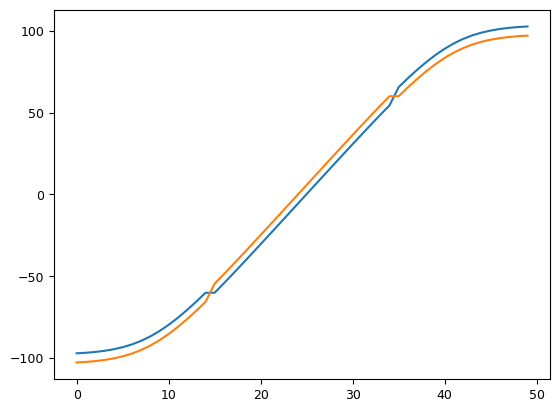

In [36]:
plt.plot(x_eq2[:, :, 0])

In [37]:
xx = x_eq[:, 0]
freqs.shape

(50, 3)

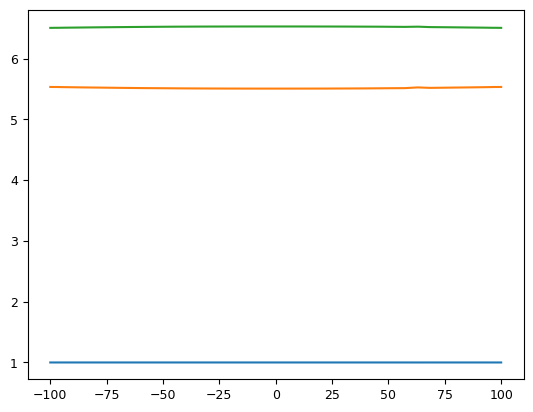

In [90]:

plt.plot(xx, freqs);

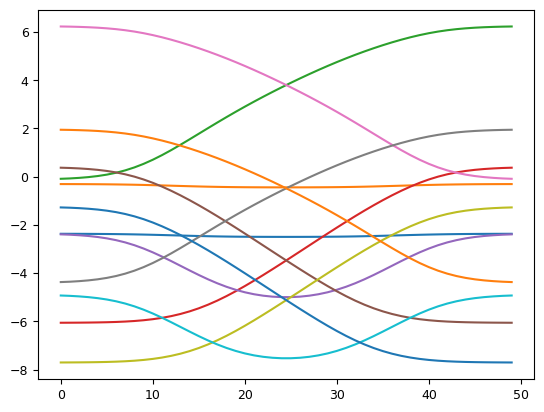

In [91]:
plt.plot(waveform);

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


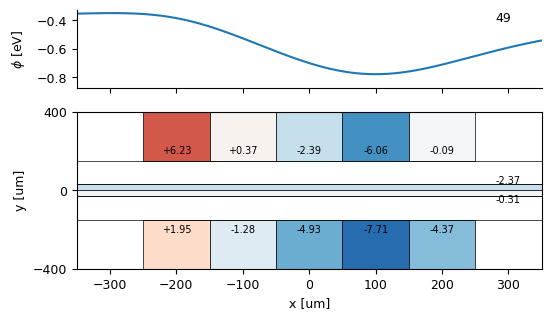

In [40]:
from models.surface_trap.plot import animate_waveform_on_trap

ani = animate_waveform_on_trap(trap, waveform)
ani.save('waveform.gif')


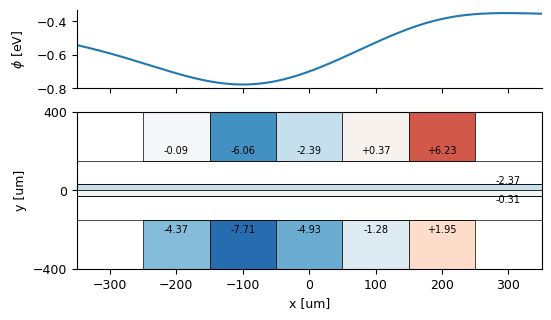

In [41]:
_ = plot_voltages_on_trap(trap, waveform[0])

In [99]:
r = results[0]

In [102]:
import json

rj = r.to_json()
with open('r0.json', 'w') as fp:
    json.dump(rj, fp)